1.

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.load("moon-all-input.npy")
y = np.load("moon-all-output.npy")

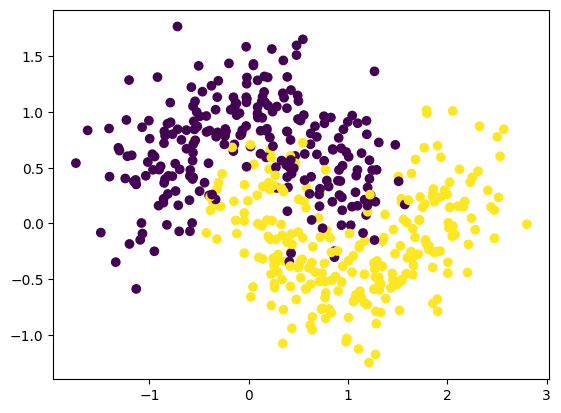

In [33]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

2.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

In [35]:
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.84
RandomForestClassifier 0.88
SVC 0.896
VotingClassifier 0.904


3.

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier

k = 3000

base_stump = DecisionTreeClassifier(max_depth=1, random_state=42)

ada_clf = AdaBoostClassifier(
    base_stump, n_estimators=k,
    algorithm="SAMME", learning_rate=1, random_state=42
)

ada_clf.fit(X_train, y_train)

classifiers = {}
alphas = []
instance_weights = []
weighted_errors = []
train_accuracies = []
test_accuracies = []
train_predictions = list(ada_clf.staged_predict(X_train))
test_predictions = list(ada_clf.staged_predict(X_test))

for k, (estimator, alpha) in enumerate(zip(ada_clf.estimators_, ada_clf.estimator_weights_)):

    classifiers[k] = estimator

    alphas.append(alpha)
    instance_weights.append(ada_clf.estimator_errors_[k])

    weighted_error = ada_clf.estimator_errors_[k]
    weighted_errors.append(weighted_error)

    train_accuracy = accuracy_score(y_train, train_predictions[k])
    train_accuracies.append(train_accuracy)

    test_accuracy = accuracy_score(y_test, test_predictions[k])
    test_accuracies.append(test_accuracy)


c:\Users\jacob\School\CIS4930\adaboost\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


4.

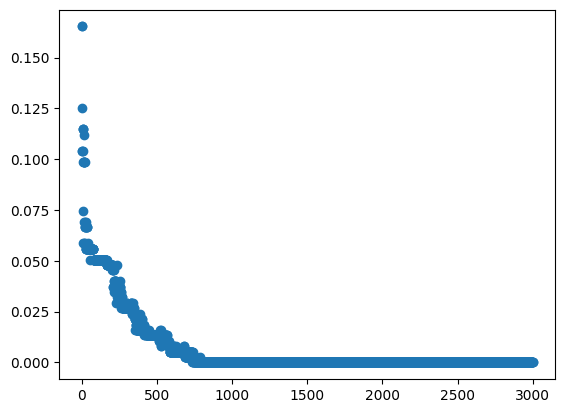

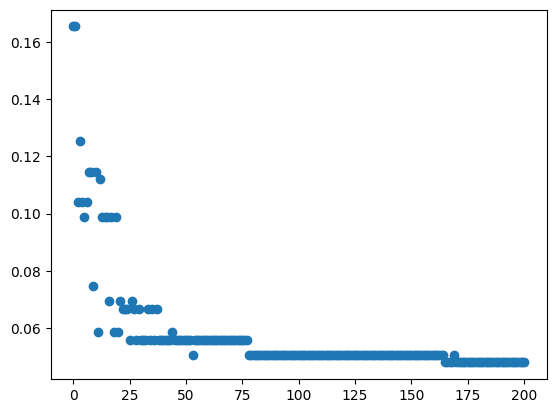

In [37]:
plt.scatter([i for i in range(k+1)], [1-accuracy for accuracy in train_accuracies])
plt.show()

plt.scatter([i for i in range(201)], [1-accuracy for accuracy in train_accuracies[:201]])
plt.show()

The error rate of the model on the training declines as more ensemble models are added. This is expected behavior as the models are able to better fit in later iterations.

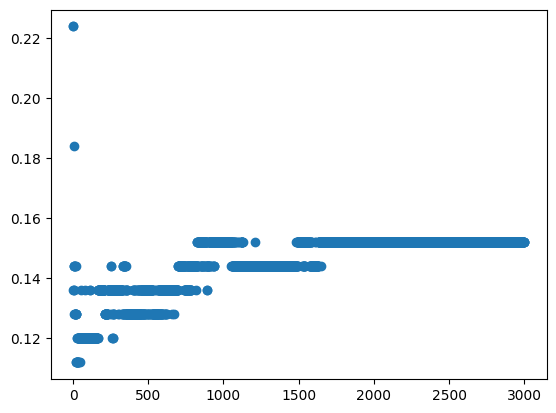

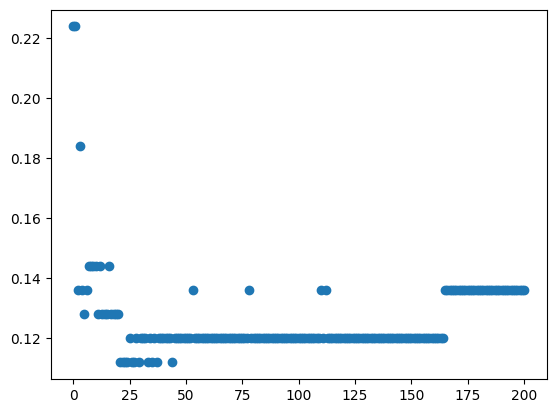

In [38]:
plt.scatter([i for i in range(k+1)], [1-accuracy for accuracy in test_accuracies])
plt.show()

plt.scatter([i for i in range(201)], [1-accuracy for accuracy in test_accuracies[:201]])
plt.show()

The error rate of the model on the test data steeply declines on the test data to 0.12 but increases to ~0.15 as the models may be overfitting in later iterations.

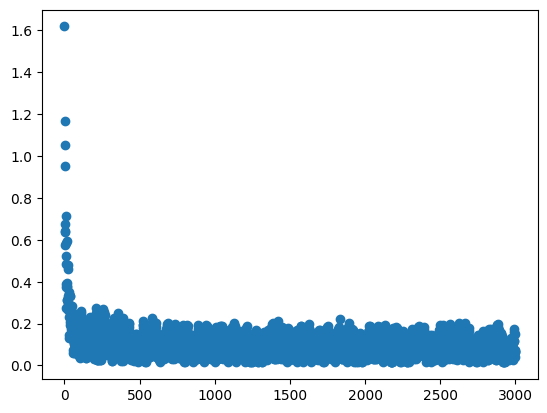

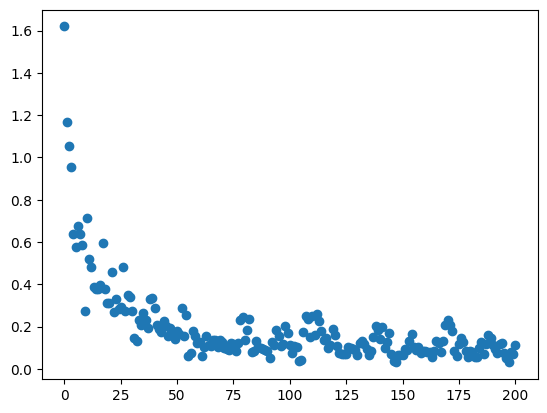

In [39]:
plt.scatter([i for i in range(k+1)], alphas)
plt.show()

plt.scatter([i for i in range(201)], alphas[:201])
plt.show()

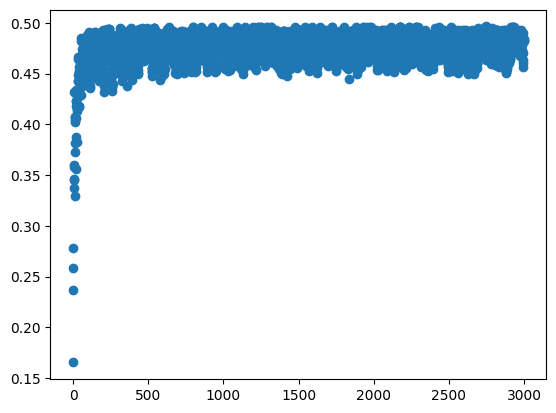

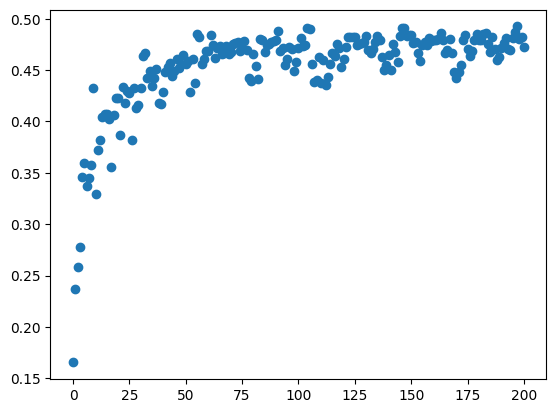

In [40]:
plt.scatter([i for i in range(k+1)], weighted_errors)
plt.show()

plt.scatter([i for i in range(201)], weighted_errors[:201])
plt.show()

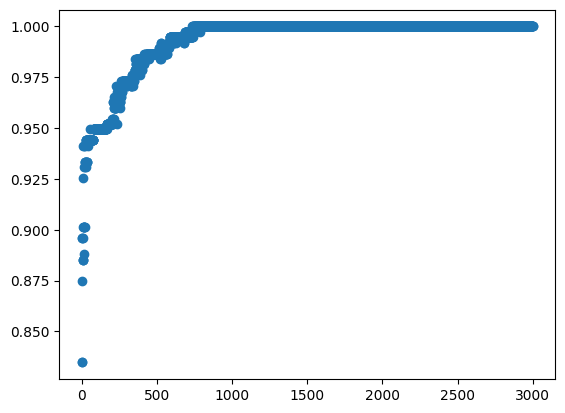

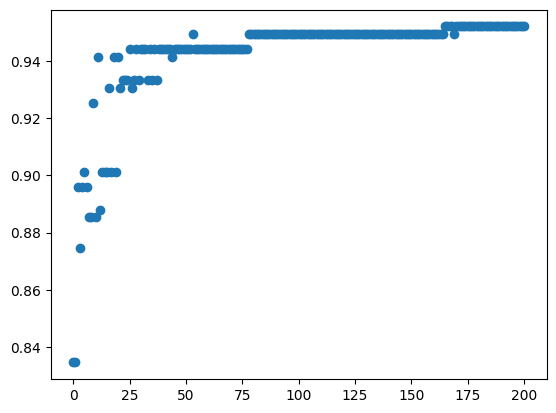

In [41]:
plt.scatter([i for i in range(k+1)], train_accuracies)
plt.show()

plt.scatter([i for i in range(201)], train_accuracies[:201])
plt.show()

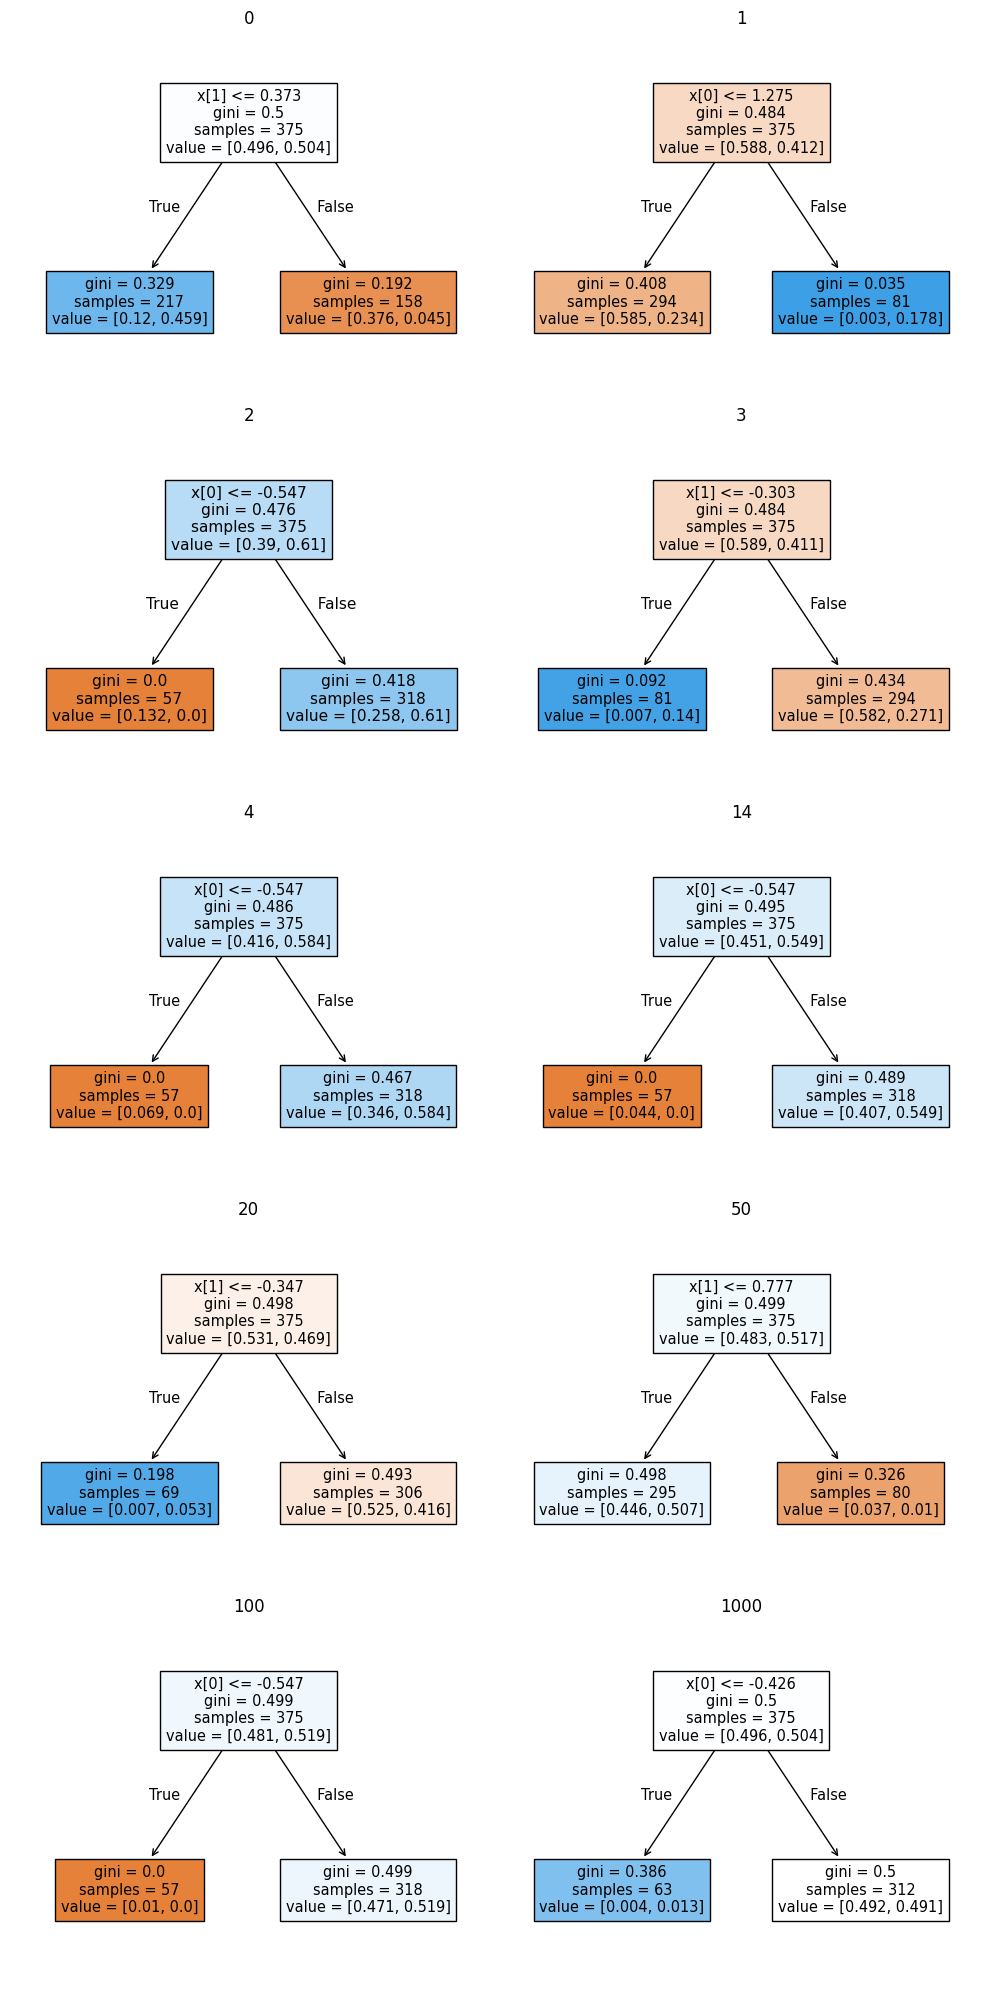

In [47]:
plt.figure(figsize=(10,20))
for i, idx in enumerate([0, 1, 2, 3, 4, 14, 20, 50, 100, 1000]):
    plt.subplot(5, 2, i+1)
    plot_tree(classifiers[idx], filled=True)
    plt.title(f"{idx}")
plt.tight_layout()
plt.show()
